<a href="https://colab.research.google.com/github/moch1996/MachineLearningProj/blob/master/assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
data = np.genfromtxt('data-pca.txt', delimiter=',')
data[0,0] = 3.38156
x = data[:,0]
y = data[:,1]
data[:5]

array([[3.38156, 3.38911],
       [4.52788, 5.85418],
       [2.65568, 4.41199],
       [2.76523, 3.71541],
       [2.84656, 4.17551]])

In [3]:
print(np.var(x))
print(np.sqrt(np.var(x))**2)

1.34852614662096
1.3485261466209602


In [4]:
#Normalized data
def normalize(x,y) :
  mux = np.mean(x)
  muy = np.mean(y)
  sdx = np.sqrt(np.var(x))
  sdy = np.sqrt(np.var(y))

  xn = (x - mux ) / sdx
  yn = (y - muy ) / sdy

  return xn,yn

In [5]:
xn = normalize(x,y)[0]
yn = normalize(x,y)[1]
print(np.mean(xn)) #xn의 평균 = 0
print(np.mean(yn)) #yn의 평균 = 0
print(np.sqrt(np.var(xn))) #xn의 표준편차 = 1
print(np.sqrt(np.var(yn))) #yn의 표준편차 = 1

-1.509903313490213e-16
-4.840572387365683e-16
0.9999999999999999
0.9999999999999999


In [6]:
z = np.ones((50,2))
z[:,0] = xn
z[:,1] = yn
len(z)

50

In [7]:
def covariance(x,y) :
  n = len(x)
  covar = np.dot(x.T,y) / n

  return covar
sigma = covariance(z,z)
sigma

array([[1.     , 0.73553],
       [0.73553, 1.     ]])

In [8]:
eig_val, eig_vec = np.linalg.eig(sigma)

In [9]:
eig_val_matrix = np.diag(eig_val)
print(eig_val_matrix)
test = np.dot(eig_vec,eig_val_matrix)
print(test)
final = np.dot(test,eig_vec.T)
print(final)

[[1.73553 0.     ]
 [0.      0.26447]]
[[ 1.22720503 -0.18700853]
 [ 1.22720503  0.18700853]]
[[1.      0.73553]
 [0.73553 1.     ]]


In [10]:
def pc_direc(covariance) :
  direction_matrix = np.linalg.eig(covariance)[1]
  return direction_matrix
principal_directions = pc_direc(sigma)
principal_directions

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [11]:
k1_direc = principal_directions[:,0]
k2_direc = principal_directions[:,1]
print(k1_direc)
print("")
print(k2_direc)

[0.70710678 0.70710678]

[-0.70710678  0.70710678]


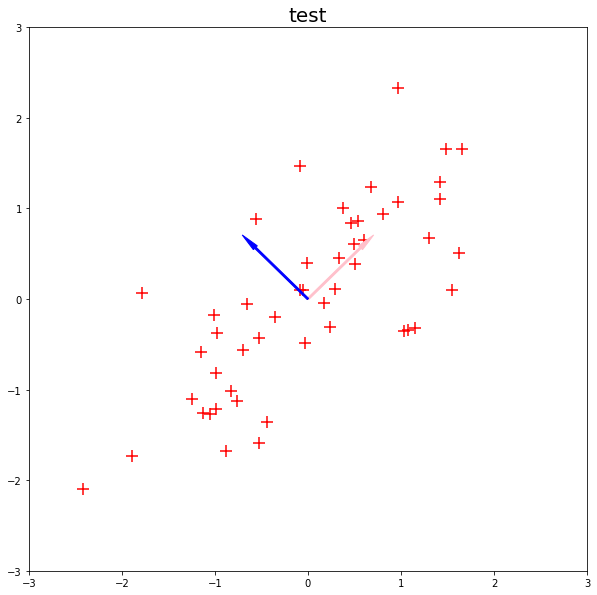

In [12]:
fig1 = plt.figure(1,figsize=(10,10))
ax1 = fig1.add_subplot(111)
ax1.scatter(xn, yn , s=150, c='red', marker = '+')
ax1.add_patch(
     patches.Arrow(
        0.0, 0.0,
        k1_direc[0],k1_direc[1],
        width=0.1,
        edgecolor = 'pink',
        facecolor = 'pink'
     ))
ax1.add_patch(
     patches.Arrow(
        0.0, 0.0,
        k2_direc[0],k2_direc[1],
        width=0.1,
        edgecolor = 'blue',
        facecolor = 'blue'
     ))


plt.title('test',fontsize = 20)
plt.xlim(-3,3)
plt.ylim(-3,3)

plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)


In [13]:
k1_direc[1] / k1_direc[0] 

1.0

In [14]:
k2_direc[1] / k2_direc[0]

-1.0

In [15]:
slope_1 = k1_direc[1] / k1_direc[0]
slope_2 = k2_direc[1] / k2_direc[0]

In [16]:
xx_1 = np.linspace(-2.5,2.5)
yy_1 = slope_1 * xx_1
xx_2 = np.linspace(-2.5,2.5)
yy_2 = slope_2 * xx_2

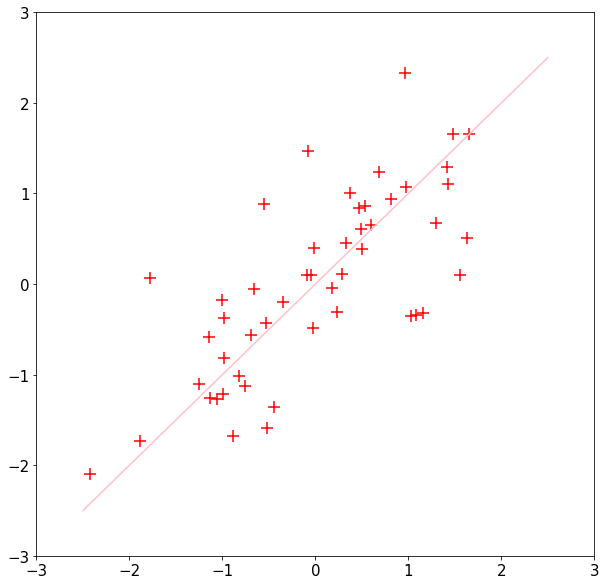

In [17]:
fig1 = plt.figure(1,figsize=(10,10))
ax1 = fig1.add_subplot(111)
ax1.scatter(xn, yn , s=150, c='red', marker = '+')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.plot(xx_1,yy_1,c='pink')

In [19]:
print(z[:,0][:5])
print(z[:,1][:5])
print(z[:2])
print(-1/slope_1)
slope1_inv_test =-1/(slope_1)
print("")
print(slope1_inv_test)
b_t = z[:,1] - slope1_inv_test*z[:,0]
print("")
print("")
print(b_t[:5])
result_t = slope1_inv_test * z[:,0] + b_t
print(result_t[:5])
final_x = (result_t) / slope_1
final_y = (final_x) * slope_1
print(final_x[:10])
print(final_y[:10])

[-0.5233151   0.46381907 -1.14839444 -1.0540573  -0.98402134]
[-1.59279489  0.84034673 -0.58316356 -1.27072124 -0.8165806 ]
[[-0.5233151  -1.59279489]
 [ 0.46381907  0.84034673]]
-1.0

-1.0


[-2.11610999  1.3041658  -1.731558   -2.32477854 -1.80060194]
[-1.59279489  0.84034673 -0.58316356 -1.27072124 -0.8165806 ]
[-1.59279489  0.84034673 -0.58316356 -1.27072124 -0.8165806   1.46633237
 -1.35221189  1.65623047  0.09440519  0.61245716]
[-1.59279489  0.84034673 -0.58316356 -1.27072124 -0.8165806   1.46633237
 -1.35221189  1.65623047  0.09440519  0.61245716]


In [26]:
def projection(z, axis=slope_1):
  projection_matrix = np.ones((len(z),2))
  cliff = -1 *(1/axis)
  b = z[:,1] - cliff*z[:,0]
  
  x = (axis / (axis**2 +1))*b
  y = axis * x
  projection_matrix[:,0] = x
  projection_matrix[:,1] = y

  return projection_matrix
    

    #projection = # compute the projection of point on the axis #
    
    #return projection


In [27]:
print(projection(z,-1)[:5])
print(projection(z,1)[:5])

[[ 0.5347399  -0.5347399 ]
 [-0.18826383  0.18826383]
 [-0.28261544  0.28261544]
 [ 0.10833197 -0.10833197]
 [-0.08372037  0.08372037]]
[[-1.058055   -1.058055  ]
 [ 0.6520829   0.6520829 ]
 [-0.865779   -0.865779  ]
 [-1.16238927 -1.16238927]
 [-0.90030097 -0.90030097]]


In [22]:
print(z[:5])

[[-0.5233151  -1.59279489]
 [ 0.46381907  0.84034673]
 [-1.14839444 -0.58316356]
 [-1.0540573  -1.27072124]
 [-0.98402134 -0.8165806 ]]


In [28]:
np.argmax(projection(z,-1))

95

In [18]:
projection(z,1)

NameError: ignored

(-3.0, 3.0)

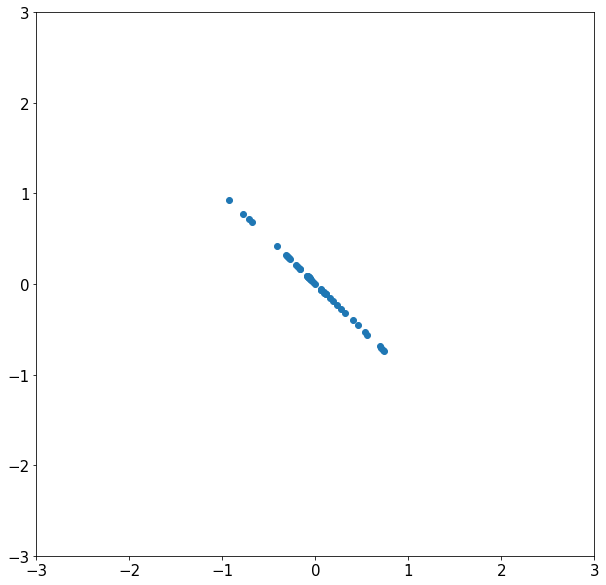

In [31]:
plt.figure(1,figsize=(10,10))
plt.scatter(projection(z,-1)[:,0],projection(z,-1)[:,1])
plt.ylim(-3,3)
plt.xlim(-3,3)

In [ ]:
eig_vec[:,0] * z[:5]

array([[-0.37003966, -1.12627607],
       [ 0.32796961,  0.59421487],
       [-0.8120375 , -0.41235891],
       [-0.74533107, -0.8985356 ],
       [-0.69580816, -0.57740968]])

#OUTPUT

1. Plot the original data points [1pt]

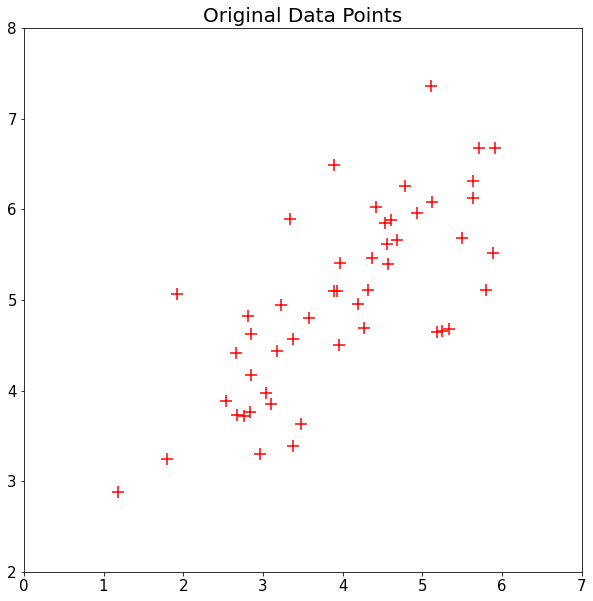

In [ ]:
plt.figure(1,figsize=(10,10))
plt.scatter(data[:,0], data[:,1], s=150, c='red', marker = '+')
plt.title('Original Data Points',fontsize = 20)
plt.xlim(0,7)
plt.ylim(2,8)

plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)

plt.show()

2. Plot the normalized data points [1pt]

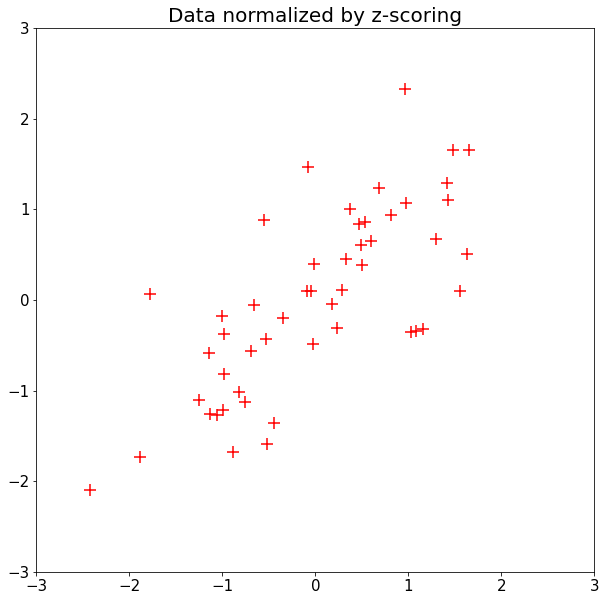

In [ ]:
plt.figure(1,figsize=(10,10))
plt.scatter(xn, yn , s=150, c='red', marker = '+')
plt.title('Data normalized by z-scoring',fontsize = 20)
plt.xlim(-3,3)
plt.ylim(-3,3)

plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)

plt.show()

3. Plot the principal axes [2pt]

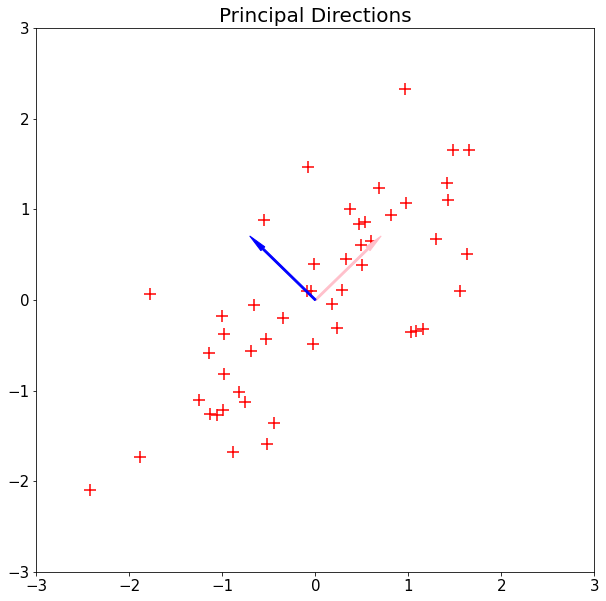

In [33]:
fig1 = plt.figure(1,figsize=(10,10))
ax1 = fig1.add_subplot(111)
ax1.scatter(xn, yn , s=150, c='red', marker = '+')
ax1.add_patch(
     patches.Arrow(
        0.0, 0.0,
        k1_direc[0],k1_direc[1],
        width=0.1,
        edgecolor = 'pink',
        facecolor = 'pink'
     ))
ax1.add_patch(
     patches.Arrow(
        0.0, 0.0,
        k2_direc[0],k2_direc[1],
        width=0.1,
        edgecolor = 'blue',
        facecolor = 'blue'
     ))


plt.title('Principal Directions',fontsize = 20)
plt.xlim(-3,3)
plt.ylim(-3,3)

plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)


4. Plot the first principal axis [3pt]

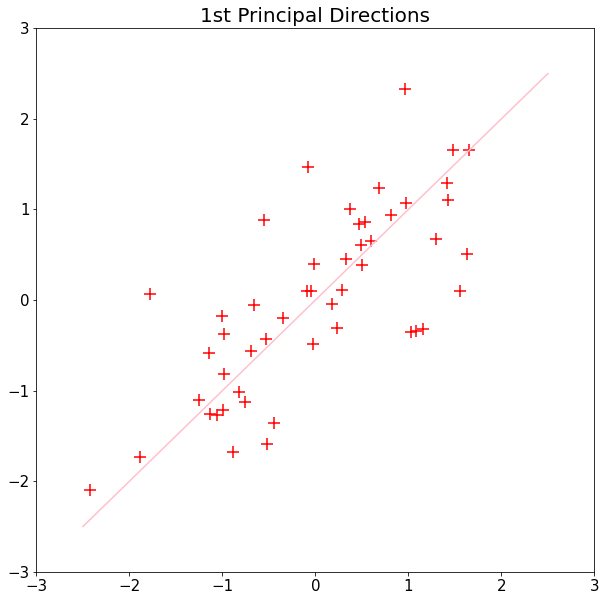

In [36]:
fig1 = plt.figure(1,figsize=(10,10))
ax1 = fig1.add_subplot(111)
ax1.scatter(xn, yn , s=150, c='red', marker = '+')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.title('1st Principal Directions',fontsize=20)
plt.plot(xx_1,yy_1,c='pink')

5. Plot the project of the normalized data points onto the first principal axis [4pt]

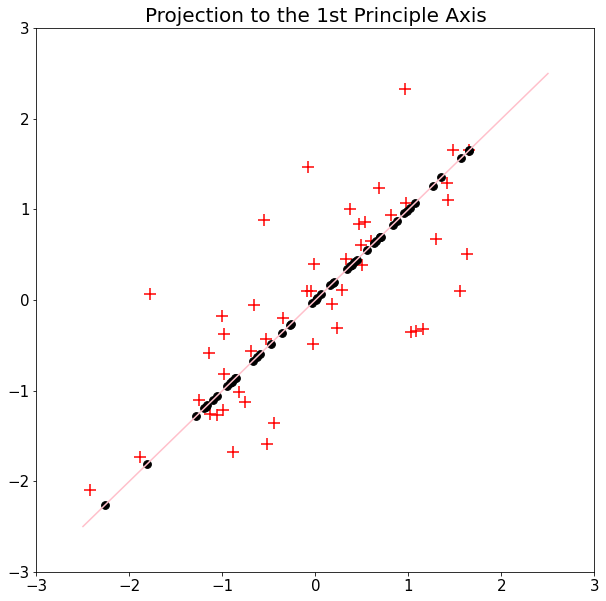

In [43]:
fig1 = plt.figure(1,figsize=(10,10))
ax1 = fig1.add_subplot(111)
ax1.scatter(xn, yn , s=150, c='red', marker = '+')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.title('Projection to the 1st Principle Axis',fontsize=20)
plt.scatter(projection(z,slope_1)[:,0],projection(z,slope_1)[:,1],c='black',s=60)
plt.plot(xx_1,yy_1,c='pink')